In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [8]:
if os.path.exists('../../Data/googleStock/Google_Stock_Train (2010-2022).csv'):
    filename = '../../Data/googleStock/Google_Stock_Train (2010-2022).csv'

In [9]:
# leyendo con csv
import csv
with open(filename, 'r') as fp:
    reader = csv.reader(fp)
    data = []
    for row in reader:
        data.append(row)

In [29]:
# leyendo con pandas
import pandas as pd
df = pd.read_csv(filename)  # using pandas to read the file
print(df.dtypes)    # looking column types
df.head() # looking for the first rows

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
1,2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2,2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
3,2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
4,2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028


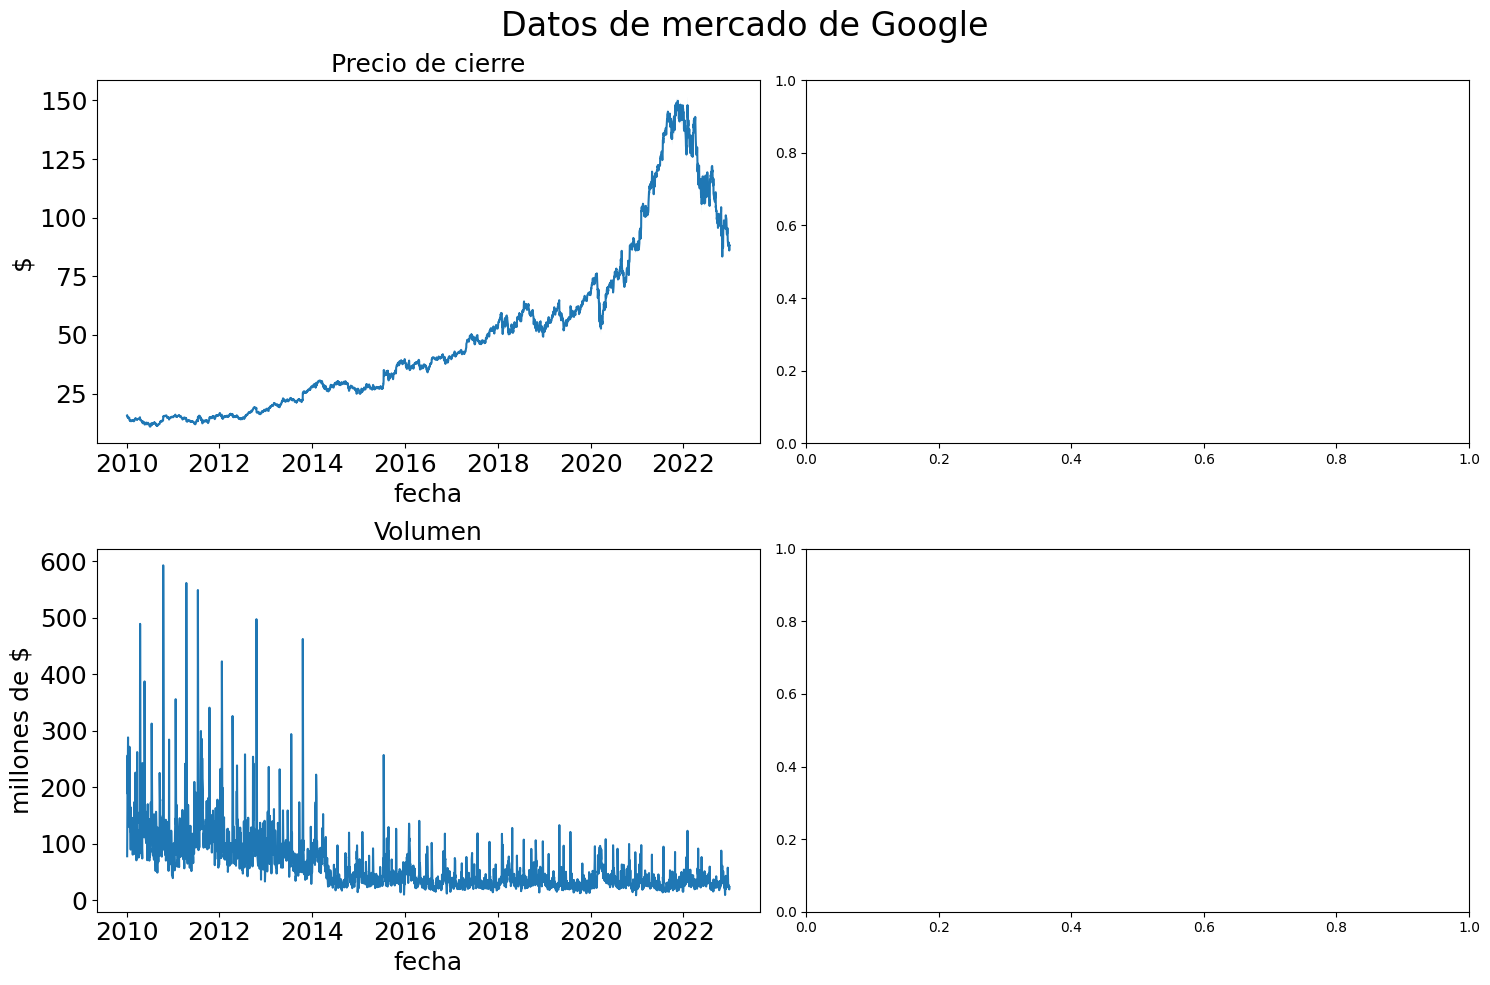

In [56]:
df.Date = pd.to_datetime(df.Date) # casting Date column to datetime objects
fig, axs = plt.subplots(2,2, figsize = (15,10))
for i in range(2):
    axs[i,0].set_xlabel('fecha', fontsize = 18)
    axs[i,0].tick_params('x',labelsize = 18)
    axs[i,0].tick_params('y',labelsize = 18)
fig.suptitle('Datos de mercado de Google', fontsize = 24)
axs[0,0].plot(df['Date'], df['Close'])
axs[0,0].fill_between(df.Date, df.Low, df.High, alpha = 0.3)
axs[0,0].set_title('Precio de cierre', fontsize = 18)
axs[0,0].set_ylabel('$', fontsize = 18)
axs[1,0].plot(df.Date, df.Volume/1e6)
axs[1,0].set_title('Volumen',fontsize = 18)
axs[1,0].set_ylabel('millones de $', fontsize = 18)
plt.tight_layout()
plt.show()


# Analizando la media mensual 

In [37]:
Analizando la 

NameError: name 'matplotlib' is not defined